# <center><font color=blue>Credit Approval</font>

<font color=blue size=4>1-Needed Packages

In [44]:
import os
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pylab as plt
import sklearn.metrics as sk
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.model_selection import KFold, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from collections import defaultdict
from itertools import chain, combinations
from copy import deepcopy
# pip install datawig
import datawig

pd.options.mode.chained_assignment = None  # default='warn'

<font color=blue size=4>2- Load Data</font> 

In [2]:
## In case of using Google Colab
# from google.colab import drive
# drive.mount('/content/drive')
# file = '/content/drive/MyDrive/Colab Notebooks/crx.data.csv'
datasetOriginal = pd.read_csv('data/crx.data.csv', header=None)
print('Dataset initial state:')
datasetOriginal.head(30)

Dataset initial state:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


In [3]:
datasetOriginal.tail(30)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
660,b,22.25,9.000,u,g,aa,v,0.085,f,f,0,f,g,00000,0,-
661,b,29.83,3.500,u,g,c,v,0.165,f,f,0,f,g,00216,0,-
662,a,23.50,1.500,u,g,w,v,0.875,f,f,0,t,g,00160,0,-
663,b,32.08,4.000,y,p,cc,v,1.500,f,f,0,t,g,00120,0,-
664,b,31.08,1.500,y,p,w,v,0.040,f,f,0,f,s,00160,0,-
665,b,31.83,0.040,y,p,m,v,0.040,f,f,0,f,g,00000,0,-
666,a,21.75,11.750,u,g,c,v,0.250,f,f,0,t,g,00180,0,-
667,a,17.92,0.540,u,g,c,v,1.750,f,t,1,t,g,00080,5,-
668,b,30.33,0.500,u,g,d,h,0.085,f,f,0,t,s,00252,0,-
669,b,51.83,2.040,y,p,ff,ff,1.500,f,f,0,f,g,00120,1,-


In [4]:
datasetOriginal.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [5]:
datasetOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
0     690 non-null object
1     690 non-null object
2     690 non-null float64
3     690 non-null object
4     690 non-null object
5     690 non-null object
6     690 non-null object
7     690 non-null float64
8     690 non-null object
9     690 non-null object
10    690 non-null int64
11    690 non-null object
12    690 non-null object
13    690 non-null object
14    690 non-null int64
15    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


<font color=blue size=4>3- Clean Data</font> 

In [6]:
# Name columns.
datasetOriginal.columns = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M",
                           "N", "O", "is_approved"]

# Analyze data types based on type of data, as its not always correctly recognized.
# Feature B has an object type but clearly the values are numerical.
floatType = 'float'
intType = 'int'
nonObjectDataTypes = {
   "B": floatType,
   "C": floatType,
   "H": floatType,
   "K": intType,
   "O": intType,
}

continuousDataColumns = list(nonObjectDataTypes.keys())
categoricalDataColumns = np.setdiff1d(datasetOriginal.columns,continuousDataColumns)

# Make data more suitable for learning by converting labels to 0,1
datasetOriginal['is_approved'].replace({"+": 1, "-": 0}, inplace=True)

# Gather missing data columns and their data types
missingDataColumns = {}
continuousType = 'continuous'
categoricalType = 'categorical'
for column in datasetOriginal.columns:
    if (datasetOriginal[column] == '?').any():
        if column in nonObjectDataTypes:
            dataType = continuousType
        else:
            dataType = categoricalType
        missingDataColumns[column] = dataType
        # replace missing value with NaN
        datasetOriginal[column] = datasetOriginal[column].replace('?', np.nan)

# all variations will be collected here, beside saving in csv files
datasets = {
    "original": datasetOriginal
}

print('\nMissing data columns:')
missingDataColumns


Missing data columns:


/home/labib/anaconda3/lib/python3.8/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


{'A': 'categorical',
 'B': 'continuous',
 'D': 'categorical',
 'E': 'categorical',
 'F': 'categorical',
 'G': 'categorical',
 'N': 'categorical'}

In [7]:
print('\nMissing data rows count per column:')
datasetOriginal.isnull().sum()


Missing data rows count per column:


A              12
B              12
C               0
D               6
E               6
F               9
G               9
H               0
I               0
J               0
K               0
L               0
M               0
N              13
O               0
is_approved     0
dtype: int64

<font color=blue size=4>4- Handling Missing Data </font>
    
<font color=grey size=3>4.1- Remove rows with missing data.</font>

<font color=grey size=3>4.2- Fill continuous data with columns mean/median values and categorical data with columns most frequent category.</font> 

<font color=grey size=3>4.3- Fill based on predictive models between mostly correlated columns.</font> 

<font color=grey size=3>4.4- Fill using unsupervised learning.</font> 

<font color=grey size=3>4.5- Fill using deep learning.</font> 

<font color=blue size=4>4.1- Remove rows with missing data</font>

In [8]:
# 4.1. Remove rows with missing data
# Pros:
#  A model trained with the removal of all missing values creates a robust model.
# Cons:
#  Loss of a lot of information.
#  Works poorly if the percentage of missing values is excessive in comparison to the complete dataset.
datasetWithRemovedRows = datasetOriginal.copy(deep=True)
# remove rows where any column has value NaN
datasetWithRemovedRows = datasetWithRemovedRows.dropna()
# set data types correctly after removing rows with NaN
for column in nonObjectDataTypes:
    datasetWithRemovedRows[column] = datasetWithRemovedRows[column].astype(nonObjectDataTypes[column])
# save data to a new csv
datasetWithRemovedRows.to_csv("data/crx.data_removed_missing.csv", index=False, encoding='utf8')
datasets['after removing missing rows'] = datasetWithRemovedRows
# validate rows removal is done correctly
assert datasetWithRemovedRows.isnull().any().any() == False
assert datasetOriginal.shape[0] > datasetWithRemovedRows.shape[0]

print('\nContinuous columns info:')
datasetWithRemovedRows.describe()


Continuous columns info:


,B,C,H,K,O,is_approved
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,31.503813,4.829533,2.244296,2.502297,1013.761103,0.453292
std,11.838267,5.027077,3.371120,4.968497,5253.278504,0.498195
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.040000,0.165000,0.000000,0.000000,0.000000
50%,28.420000,2.835000,1.000000,0.000000,5.000000,0.000000
75%,38.250000,7.500000,2.625000,3.000000,400.000000,1.000000
max,76.750000,28.000000,28.500000,67.000000,100000.000000,1.000000


<font color=blue size=4>4.2- Fill continuous data with columns mean values and categorical data with columns most frequent category</font>

In [9]:
# 4.2. Fill continuous data with columns mean values and categorical data with columns most frequent category
# Pros:
#  Prevent data loss which results in deletion of rows or columns.
#  Works well with a small dataset and easy to implement.
# Cons:
#  Can cause data leakage.
#  Does not factor the covariance between features (for continuous ones).
datasetWithCalculatedRows = datasetOriginal.copy(deep=True)
for column in missingDataColumns:
    if missingDataColumns[column] == continuousType:
        imp = SimpleImputer(missing_values=np.nan, strategy='median')
        imp.fit(datasetWithRemovedRows[column].values.reshape(-1, 1))
        datasetWithCalculatedRows[column] = imp.transform(datasetWithCalculatedRows[column].values.reshape(-1, 1))
    else:
        imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        imp.fit(datasetWithRemovedRows[column].values.reshape(-1, 1))
        datasetWithCalculatedRows[column] = imp.transform(datasetWithCalculatedRows[column].values.reshape(-1, 1))
# set data types correctly after calculating rows with NaN
for column in nonObjectDataTypes:
    datasetWithCalculatedRows[column] = datasetWithCalculatedRows[column].astype(nonObjectDataTypes[column])
# save data to a new csv
datasetWithCalculatedRows.to_csv("data/crx.data_calculated_missing.csv", index=False, encoding='utf8')
datasets['after calculating missing rows'] = datasetWithCalculatedRows
# validate rows calculation is done correctly
assert datasetWithCalculatedRows.isnull().any().any() == False
assert datasetOriginal.shape[0] == datasetWithCalculatedRows.shape[0]

print('\nContinuous columns correlation:')
corr = datasetWithRemovedRows.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


Continuous columns correlation:


,B,C,H,K,O,is_approved
B,1,0.22,0.42,0.2,0.029,0.18
C,0.22,1,0.3,0.27,0.12,0.21
H,0.42,0.3,1,0.33,0.052,0.33
K,0.2,0.27,0.33,1,0.058,0.41
O,0.029,0.12,0.052,0.058,1,0.17
is_approved,0.18,0.21,0.33,0.41,0.17,1


<font color=blue size=4>4.3- Fill based on predictive models between mostly correlated columns</font>

Association rules (node=columnName_rowValue)


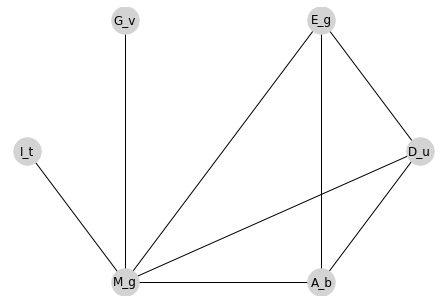

In [10]:
# 4.3. Fill based on predictive models between mostly correlated columns
# Pros:
#  Gives a better result than earlier methods.
#  Takes into account the covariance between missing value column and other columns.
# Cons:
#  Considered only as a proxy for the true values.
datasetWithPredictedRows = datasetOriginal.copy(deep=True)
# Fill continuous-data-type columns based on predictive models between mostly correlated columns
continuousDataColumnsWithoutMissingData = np.append(np.setdiff1d(list(nonObjectDataTypes.keys()),list(missingDataColumns.keys())), 'is_approved')
continuousDataColumnsWithMissingData = np.intersect1d(list(nonObjectDataTypes.keys()), list(missingDataColumns.keys()))
for column in continuousDataColumnsWithMissingData:
    continuousDataColumnsWithoutMissingData = np.append(continuousDataColumnsWithoutMissingData,column)
    continuousDatasetWithRemovedRows = datasetWithRemovedRows[continuousDataColumnsWithoutMissingData]
    continuousDatasetWithPredictedRows = datasetWithPredictedRows[continuousDataColumnsWithoutMissingData]

    xTrain = continuousDatasetWithRemovedRows.drop(column, axis=1)
    yTrain = continuousDatasetWithRemovedRows[column]

    testData = continuousDatasetWithPredictedRows[continuousDatasetWithPredictedRows[column].isnull()]
    xTest = testData.drop(column, axis=1)

    model = LinearRegression()
    model.fit(xTrain, yTrain)
    yPred = model.predict(xTest)
    datasetWithPredictedRows[column][datasetWithPredictedRows[column].isnull()] = np.around(yPred, 2)

# Fill nominal-categoricies-data-type columns
# Apriori algorithm is a straight-forward Association rule mining technique
# to identify underlying relations between different items.
#
# Support in Apriori is the Fraction of transactions that contain an itemset.
# So, the support of item I is defined as the number of transactions containing I divided by the total number of transactions.
#
# Confidence in Apriori is how often items in Y appear in transactions that contain X.
# So, the confidence It’s calculated as the number of transactions containing X and Y divided by the number of transactions containing X.
#
# Frequent Item Set in Apriori is simply all the itemsets that the support satisfies the minimum support threshold.
#
# It’s a bottom-up approach. We started from every single item in the itemset list.
# Then, the candidates are generated by self-joining.
# We extend the length of the itemsets one item at a time.
# The subset test is performed at each stage and the itemsets that contain infrequent subsets are pruned.
# We repeat the process until no more successful itemsets can be derived from the data.
def getAboveMinSup(itemSet, itemSetList, minSup, globalItemSetWithSup):
    freqItemSet = set()
    localItemSetWithSup = defaultdict(int)

    for item in itemSet:
        for itemSet in itemSetList:
            if item.issubset(itemSet):
                globalItemSetWithSup[item] += 1
                localItemSetWithSup[item] += 1

    for item, supCount in localItemSetWithSup.items():
        support = float(supCount / len(itemSetList))
        if(support >= minSup):
            freqItemSet.add(item)

    return freqItemSet


def getUnion(itemSet, length):
    return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length])


def pruning(candidateSet, prevFreqSet, length):
    tempCandidateSet = candidateSet.copy()
    for item in candidateSet:
        subsets = combinations(item, length)
        for subset in subsets:
            # if the subset is not in previous K-frequent get, then remove the set
            if(frozenset(subset) not in prevFreqSet):
                tempCandidateSet.remove(item)
                break
    return tempCandidateSet

def powerset(s):
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)))

def associationRule(freqItemSet, itemSetWithSup, minConf):
    rules = []
    for k, itemSet in freqItemSet.items():
        for item in itemSet:
            subsets = powerset(item)
            for s in subsets:
                confidence = float(
                    itemSetWithSup[item] / itemSetWithSup[frozenset(s)])
                if(confidence > minConf):
                    rules.append([set(s), set(item.difference(s)), confidence])
    return rules


def getItemSetFromList(itemSetList):
    tempItemSet = set()

    for itemSet in itemSetList:
        for item in itemSet:
            tempItemSet.add(frozenset([item]))

    return tempItemSet

def apriori(itemSetList, minSup, minConf):
    C1ItemSet = getItemSetFromList(itemSetList)
    # Final result global frequent itemset
    globalFreqItemSet = dict()
    # Storing global itemset with support count
    globalItemSetWithSup = defaultdict(int)

    L1ItemSet = getAboveMinSup(
        C1ItemSet, itemSetList, minSup, globalItemSetWithSup)
    currentLSet = L1ItemSet
    k = 2

    # Calculating frequent item set
    while(currentLSet):
        # Storing frequent itemset
        globalFreqItemSet[k-1] = currentLSet
        # Self-joining Lk
        candidateSet = getUnion(currentLSet, k)
        # Perform subset testing and remove pruned supersets
        candidateSet = pruning(candidateSet, currentLSet, k-1)
        # Scanning itemSet for counting support
        currentLSet = getAboveMinSup(
            candidateSet, itemSetList, minSup, globalItemSetWithSup)
        k += 1

    rules = associationRule(globalFreqItemSet, globalItemSetWithSup, minConf)
    rules.sort(key=lambda x: x[2]*-1)

    return globalFreqItemSet, rules

graph = nx.Graph()
def plotAssociationRules(rules):
    for rule in rules:
        fromNodes = rule[0]
        toNodes = rule[1]
        for fromNode in fromNodes:
            for toNode in toNodes:
                graph.add_nodes_from([fromNode, toNode])
                graph.add_weighted_edges_from([(fromNode, toNode, rule[2])])

categoricalDataColumnsWithoutMissingData = np.setdiff1d(np.setdiff1d(datasetOriginal.columns,list(nonObjectDataTypes.keys())),list(missingDataColumns.keys()))
categoricalDataColumnsWithMissingData = np.setdiff1d(list(missingDataColumns.keys()), list(nonObjectDataTypes.keys()))

for missingDataColumn in categoricalDataColumnsWithMissingData:
    categoricalDataColumnsWithoutMissingData = np.append(categoricalDataColumnsWithoutMissingData,missingDataColumn)
    categoricalDatasetWithRemovedRows = datasetWithRemovedRows[categoricalDataColumnsWithoutMissingData]
    categoricalDatasetWithPredictedRows = datasetWithPredictedRows[categoricalDataColumnsWithoutMissingData]
    # Make each column unique even if there are common values between columns like `t` and `f`
    for column in categoricalDatasetWithRemovedRows:
        categoricalDatasetWithRemovedRows[column] = [column + '_' + str(rowValue) for rowValue in categoricalDatasetWithRemovedRows[column]]
    # Use apriori to collect association rules
    globalFreqItemSet, rules = apriori(categoricalDatasetWithRemovedRows.to_numpy(), 0.5, 0.5)

    plotAssociationRules(rules)
    
    usefulRules = []
    columnUniqueValues = categoricalDatasetWithRemovedRows[column].unique()
    for rule in rules:
        ruleValues = list(rule[0]) + list(rule[1])
        for columnValue in columnUniqueValues:
            # keep rules that include the column with missing data
            if columnValue in ruleValues:
                usefulRules.append(ruleValues)
    # Rename prediction data similarly to training data to be able to match 
    for column in categoricalDatasetWithPredictedRows[categoricalDatasetWithPredictedRows[column].isnull()]:
        if missingDataColumn != column:
            categoricalDatasetWithPredictedRows[column] = [column + '_' + str(rowValue) for rowValue in categoricalDatasetWithPredictedRows[column]]
    # Predict missing data
    # Keep in mind, some rows might still have no clear association rules to predict.
    # We will use most frequent value for those.
    yPred = [];
    stillHaveMissingValues = False
    for row in categoricalDatasetWithPredictedRows[categoricalDatasetWithPredictedRows[column].isnull()].drop(column, axis=1).to_numpy():
        r = len(row)
        matched = False
        # collect all possible combinations of row starting from the whole row to single column values.
        # first match with association rules is used to predict missing column value.
        while(r >= 1 and matched == False):
            for combination in combinations(row, r):
                if matched == False:
                    for rule in usefulRules:
                        if matched == False and len(np.intersect1d(combination,rule)) == len(combination):
                            # get missing column value from association rule
                            matching = [s for s in rule if missingDataColumn in s]
                            # remove added unique string from matched value
                            yPred.append(matching[0].split('_')[-1])
                            # stop looking for matched values for that row
                            matched = True
            r -= 1
        # if no match found, keep value as `NaN`
        if matched == False:
            stillHaveMissingValues = True
            yPred.append(np.nan)
    datasetWithPredictedRows[missingDataColumn][datasetWithPredictedRows[missingDataColumn].isnull()] = yPred
    if stillHaveMissingValues == True:
        imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        imp.fit(datasetWithPredictedRows[missingDataColumn].values.reshape(-1, 1))
        datasetWithPredictedRows[missingDataColumn] = imp.transform(datasetWithPredictedRows[missingDataColumn].values.reshape(-1, 1))
# set data types correctly after predicting rows with NaN
for column in nonObjectDataTypes:
    datasetWithPredictedRows[column] = datasetWithPredictedRows[column].astype(nonObjectDataTypes[column])
# save data to a new csv
datasetWithPredictedRows.to_csv("data/crx.data_predicted_missing.csv", index=False, encoding='utf8')
datasets['after predicting missing rows'] = datasetWithPredictedRows
# validate rows prediction is done correctly
assert datasetWithPredictedRows.isnull().any().any() == False
assert datasetOriginal.shape[0] == datasetWithPredictedRows.shape[0]

# Visualize association rules
print("Association rules (node=columnName_rowValue)")
nx.draw_shell(graph, with_labels=True, node_size=750, node_color="lightgrey")

<font color=blue size=4>4.4- Fill using unsupervised learning.</font>

In [11]:
# 4.4. Fill using unsupervised learning
# Pros:
# Support more non-linearity between data, as it doesn't need strong correlation  
#  Takes into account the covariance between missing value column and other columns.
# Cons:
#  Considered only as a proxy for the true values.
datasetWithUnsupervisedLearntRows = datasetOriginal.copy(deep=True)

categoriesMap = {}
# Convert categorical columns data to ordinal integers
for column in categoricalDataColumns:
    columnUniqueValues = datasetWithUnsupervisedLearntRows[column][datasetWithUnsupervisedLearntRows[column].notnull()].unique()
    categoryMap = ({ index: v for index, v in enumerate(columnUniqueValues) })
    keyList = list(categoryMap.keys())
    valList = list(categoryMap.values())
    categoriesMap[column] = {'keys': keyList, 'values': valList, 'ordinalMap': categoryMap}
    ordinalIntegers = [keyList[valList.index(rowValue)] for rowValue in datasetWithUnsupervisedLearntRows[column] if rowValue == rowValue]
    datasetWithUnsupervisedLearntRows[column][datasetWithUnsupervisedLearntRows[column] == datasetWithUnsupervisedLearntRows[column]] = ordinalIntegers
    
imputer = KNNImputer(n_neighbors=2, weights="uniform")
transformedData = imputer.fit_transform(datasetWithUnsupervisedLearntRows)
rotatedTransformedData = transformedData.T
for index, column in enumerate(datasetWithUnsupervisedLearntRows.columns):
    datasetWithUnsupervisedLearntRows[column] = rotatedTransformedData[index]

# Convert ordinal integers to original categorical columns data
for column in categoricalDataColumns:
    datasetWithUnsupervisedLearntRows[column] = [categoriesMap[column]['ordinalMap'][round(rowValue,0)] for rowValue in datasetWithUnsupervisedLearntRows[column]]

# set data types correctly after unsupervised learning rows with NaN
for column in nonObjectDataTypes:
    datasetWithUnsupervisedLearntRows[column] = datasetWithUnsupervisedLearntRows[column].astype(nonObjectDataTypes[column])
# save data to a new csv
datasetWithUnsupervisedLearntRows.to_csv("data/crx.data_unsupervised_learnt_missing.csv", index=False, encoding='utf8')
datasets['after unsupervised learning missing rows'] = datasetWithUnsupervisedLearntRows
# validate rows unsupervised learning is done correctly
assert datasetWithUnsupervisedLearntRows.isnull().any().any() == False
assert datasetOriginal.shape[0] == datasetWithUnsupervisedLearntRows.shape[0]

<font color=blue size=4>4.5- Fill using deep learning.</font>

In [12]:
# 4.5. Fill using deep learning
# Pros:
#  Quite accurate compared to other methods.
#  It supports both CPUs and GPUs.
# Cons:
#  Still can be quite slow with large datasets.
datasetWithDeepLearntRows = datasetOriginal.copy(deep=True)
columns = datasetWithDeepLearntRows.columns 

for column in missingDataColumns:
    df_train = datasetWithDeepLearntRows.dropna()
    df_test = datasetWithDeepLearntRows[datasetWithDeepLearntRows[column].isnull()]
    # Initialize a SimpleImputer model
    imputer = datawig.SimpleImputer(
        input_columns=np.delete(columns,np.where(columns == column)), # column(s) containing information about the column we want to impute
        output_column= column, # the column we'd like to impute values for
        output_path = 'imputer_model' # stores model data and metrics
        )

    # Fit an imputer model on the train data
    imputer.fit(train_df=df_train, num_epochs=50)

    # Impute missing values and return original dataframe with predictions
    imputed = imputer.predict(df_test)
    datasetWithDeepLearntRows[column][datasetWithDeepLearntRows[column].isnull()] = imputed[column+'_imputed']

# set data types correctly after deep learning rows with NaN
for column in nonObjectDataTypes:
    datasetWithDeepLearntRows[column] = datasetWithDeepLearntRows[column].astype(nonObjectDataTypes[column])
# save data to a new csv
datasetWithDeepLearntRows.to_csv("data/crx.data_deep_learnt_missing.csv", index=False, encoding='utf8')
datasets['after deep learning missing rows'] = datasetWithDeepLearntRows
# validate rows deep learning is done correctly
assert datasetWithDeepLearntRows.isnull().any().any() == False
assert datasetOriginal.shape[0] == datasetWithDeepLearntRows.shape[0]

2021-02-05 23:47:05,606 [INFO]  NumExpr defaulting to 8 threads.
2021-02-05 23:47:05,858 [INFO]  
========== start: fit model
2021-02-05 23:47:05,859 [WARNING]  Already bound, ignoring bind()
2021-02-05 23:47:06,062 [INFO]  Epoch[0] Batch [0-19]	Speed: 1630.25 samples/sec	cross-entropy=0.726530	A-accuracy=0.656250
2021-02-05 23:47:06,215 [INFO]  Epoch[0] Train-cross-entropy=0.659304
2021-02-05 23:47:06,215 [INFO]  Epoch[0] Train-A-accuracy=0.685811
2021-02-05 23:47:06,217 [INFO]  Epoch[0] Time cost=0.354
2021-02-05 23:47:06,226 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2021-02-05 23:47:06,276 [INFO]  Epoch[0] Validation-cross-entropy=0.513158
2021-02-05 23:47:06,277 [INFO]  Epoch[0] Validation-A-accuracy=0.775000
2021-02-05 23:47:06,513 [INFO]  Epoch[1] Batch [0-19]	Speed: 1364.39 samples/sec	cross-entropy=0.601154	A-accuracy=0.678125
2021-02-05 23:47:06,692 [INFO]  Epoch[1] Train-cross-entropy=0.571176
2021-02-05 23:47:06,693 [INFO]  Epoch[1] Train-A-accuracy=0.721

##### <font color=blue size=4> 5- Preprocessing: Transform Data.</font>

In [13]:
# Transform Categorical data to numeric
def categoricalTransform(dataset):
    for i in dataset.columns:
        if dataset[i].dtypes=='object':
            dataset[i]=LabelEncoder().fit_transform(dataset[i])
    return dataset

# Normalize Continuous data by min/max scaling
def normTransform(dataset):
    for col in continuousDataColumns:
        maximum=dataset[col].max()
        minimum=dataset[col].min()
        dataset[col]=dataset[col].map(lambda a: (a-minimum)/(maximum-minimum))
    return dataset

# Standardize Continuous data 
def standTransform(dataset):
    for col in continuousDataColumns:
        std=dataset[col].std()
        mean=dataset[col].mean()
        dataset[col]=dataset[col].map(lambda a: (a-mean)/std)
    return dataset

# Log Continuous data (should be followed by norm/stand transformation)
def log(x):
    if x == 0:
        x = 1 
    return np.log2(x)
def logTransform(dataset):
    for col in continuousDataColumns:
        dataset[col]=dataset[col].map(log)
    return dataset

In [14]:
datasetWithRemovedRowsAllNumeric = datasetWithRemovedRows.copy(deep=True)
categoricalTransform(datasetWithRemovedRowsAllNumeric)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,is_approved
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,68,0,1
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,11,560,1
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,94,824,1
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,31,3,1
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,37,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,4,3,1.25,0,0,0,0,0,89,0,0
686,0,22.67,0.750,1,0,1,7,2.00,0,1,2,1,0,67,394,0
687,0,25.25,13.500,2,2,5,2,2.00,0,1,1,1,0,67,1,0
688,1,17.92,0.205,1,0,0,7,0.04,0,0,0,0,0,94,750,0


In [15]:
datasetWithRemovedRowsAllNumeric.describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,is_approved
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,0.689127,31.503813,4.829533,1.229709,0.468606,5.773354,5.084227,2.244296,0.534456,0.439510,2.502297,0.462481,0.165391,55.770291,1013.761103,0.453292
std,0.463206,11.838267,5.027077,0.428193,0.845963,4.296249,2.494278,3.371120,0.499194,0.496708,4.968497,0.498973,0.548475,44.706156,5253.278504,0.498195
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.580000,1.040000,1.000000,0.000000,1.000000,3.000000,0.165000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000
50%,1.000000,28.420000,2.835000,1.000000,0.000000,6.000000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,52.000000,5.000000,0.000000
75%,1.000000,38.250000,7.500000,1.000000,0.000000,10.000000,7.000000,2.625000,1.000000,1.000000,3.000000,1.000000,0.000000,91.000000,400.000000,1.000000
max,1.000000,76.750000,28.000000,2.000000,2.000000,13.000000,8.000000,28.500000,1.000000,1.000000,67.000000,1.000000,2.000000,163.000000,100000.000000,1.000000


##### <font color=blue size=4> 5- Feature Selection </font>

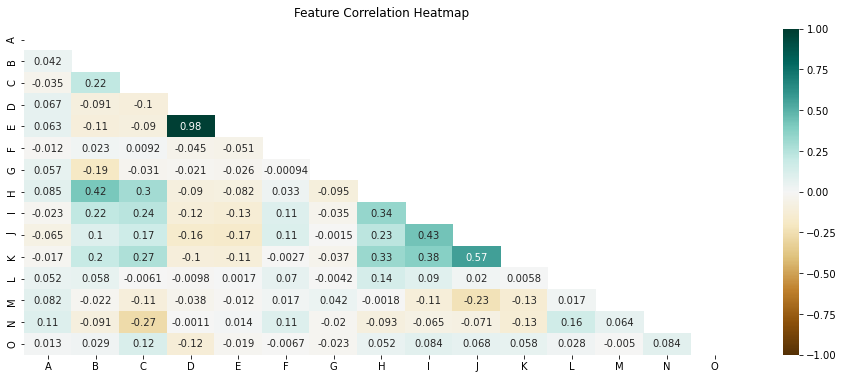

In [16]:
def heatmapFeatures(dataset):
    features_corr = dataset.iloc[:,0:-1].corr()

    plt.figure(figsize=(16, 6))
    mask = np.triu(np.ones_like(features_corr, dtype=np.bool))
    heatmap = sns.heatmap(features_corr,mask = mask,vmin=-1, vmax=1,annot=True,cmap='BrBG')

    heatmap.set_title('Feature Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

# We can see that D & E are strongly correlated, hence we can drop one of them.
heatmapFeatures(datasetWithRemovedRowsAllNumeric)

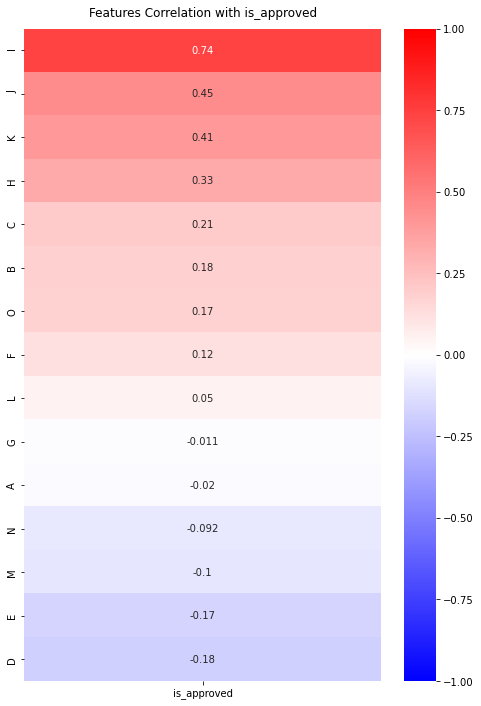

In [17]:
def heatmapFeaturesWithOutput(dataset):
  
    corr = dataset.corr().iloc[:, -1].sort_values(ascending=False)
    corr = pd.DataFrame(corr).iloc[1:,:]
    # Heatmap ranking
    plt.figure(figsize=(8, 12))
    heatmap = sns.heatmap(corr,vmin=-1, vmax=1,annot=True,cmap='bwr')

    heatmap.set_title('Features Correlation with {}'.format(dataset.columns[-1]),fontdict={'fontsize':12}, pad=12)

# G is the least correlated feature with target, followed by L & A.. hence we will drop them too
heatmapFeaturesWithOutput(datasetWithRemovedRowsAllNumeric)

In [18]:
yColumn = 'is_approved'
dataset = categoricalTransform(datasetWithRemovedRows)
X = dataset.loc[:, dataset.columns != yColumn].values
y = dataset[yColumn].values
X_new = SelectKBest(chi2).fit_transform(X, y)

print("No. of features with least scores:", X.shape[1] - X_new.shape[1])
print("We already caught 4 by manual observation.")

No. of features with least scores: 5
We already caught 4 by manual observation.


<font color=grey size=4>Based on heat maps observations.</font>

<font color=grey size=4>&emsp;We can see that <b>D</b> & <b>E</b> are strongly correlated, hence we can drop one of them.</font> 

<font color=grey size=4>&emsp;<b>G</b> is the least correlated feature with target, followed by <b>L</b> & <b>A</b>.. hence we will drop them too.</font> 

<font color=grey size=4>Based on KBest scores selection.</font>

<font color=grey size=4>&emsp;We can see that <b>5</b> features are removed, which is close to the number we got by manual observation.</font> 

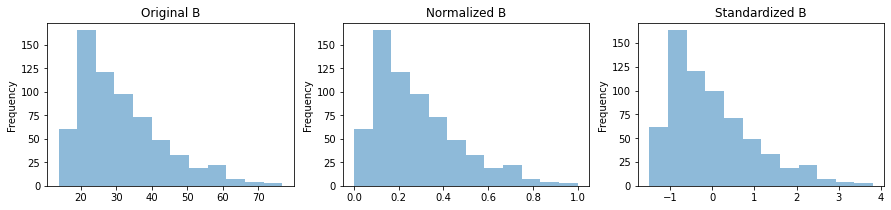

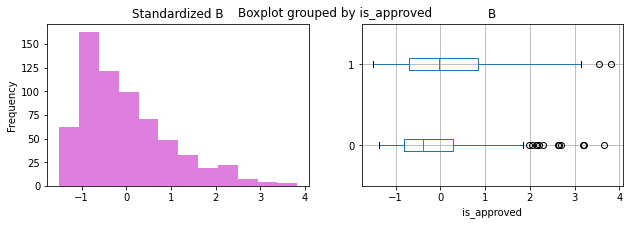

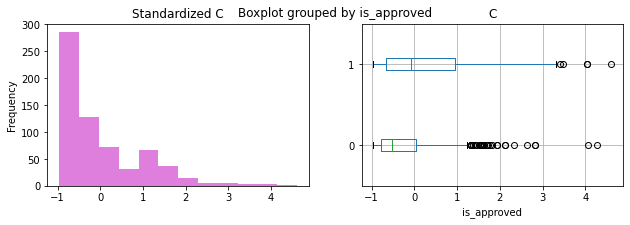

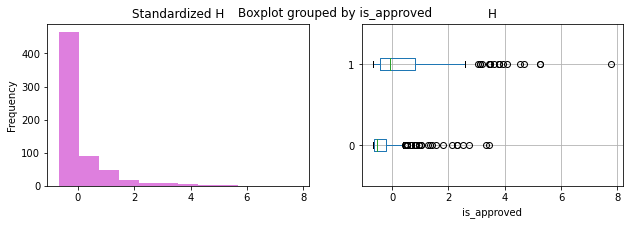

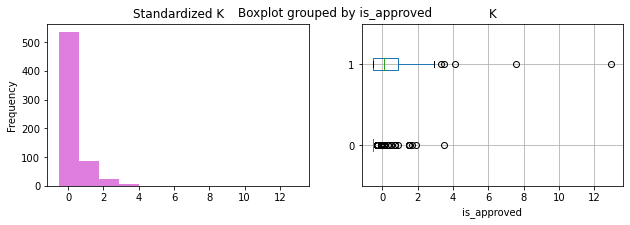

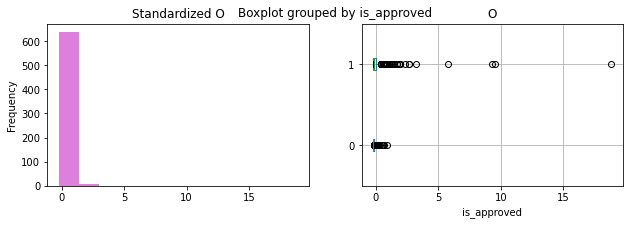

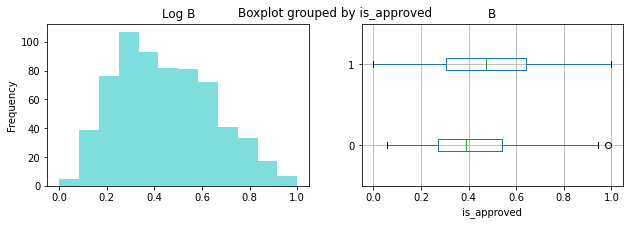

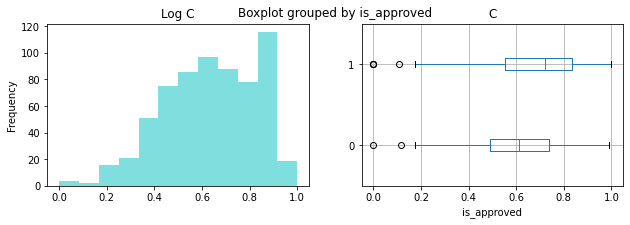

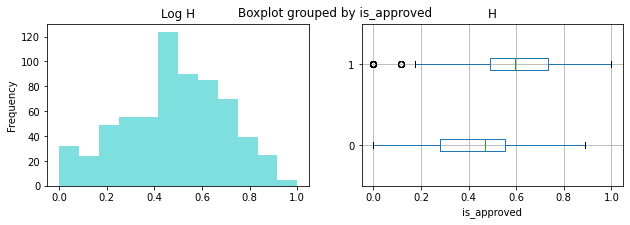

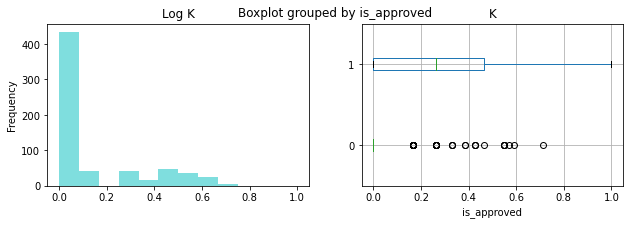

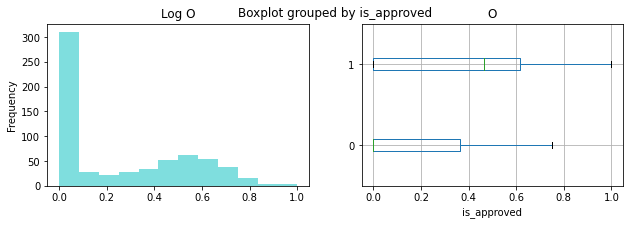

In [19]:
datasetWithRemovedRowsNormTransformed = datasetWithRemovedRows.copy(deep=True)
datasetWithRemovedRowsNormTransformed = normTransform(datasetWithRemovedRowsNormTransformed)

datasetWithRemovedRowsStandTransformed = datasetWithRemovedRows.copy(deep=True)
datasetWithRemovedRowsStandTransformed = standTransform(datasetWithRemovedRowsStandTransformed)

datasetWithRemovedRowsLogTransformed = datasetWithRemovedRows.copy(deep=True)
datasetWithRemovedRowsLogTransformed = logTransform(datasetWithRemovedRowsLogTransformed)
datasetWithRemovedRowsLogTransformed = normTransform(datasetWithRemovedRowsLogTransformed)

testColumn = continuousDataColumns[0]

plt.figure(figsize=(15,3))
plt.subplot(1, 3, 1)
plt.title('Original '+testColumn)
datasetWithRemovedRows[testColumn].plot.hist(bins=12, alpha=0.5)
plt.subplot(1, 3, 2)
plt.title('Normalized '+testColumn)
datasetWithRemovedRowsNormTransformed[testColumn].plot.hist(bins=12, alpha=0.5)
plt.subplot(1, 3, 3)
plt.title('Standardized '+testColumn)
datasetWithRemovedRowsStandTransformed[testColumn].plot.hist(bins=12, alpha=0.5)

for column in continuousDataColumns:
    fig, axes = plt.subplots(ncols=2, figsize=(10, 3), sharey=False)
    plt.subplot(1, 2, 1)
    plt.title('Standardized '+column)
    datasetWithRemovedRowsStandTransformed[column].plot.hist(bins=12, alpha=0.5, color="m")
    datasetWithRemovedRowsStandTransformed.boxplot(column=column, by='is_approved', vert=False, rot=0, return_type='axes', ax=axes[1])

for column in continuousDataColumns:
    fig, axes = plt.subplots(ncols=2, figsize=(10, 3), sharey=False)
    plt.subplot(1, 2, 1)
    plt.title('Log '+column)
    datasetWithRemovedRowsLogTransformed[column].plot.hist(bins=12, alpha=0.5, color="c")
    datasetWithRemovedRowsLogTransformed.boxplot(column=column, by='is_approved', vert=False, rot=0, return_type='axes', ax=axes[1])

<font color=blue size=4>6- Split Data.</font>

In [39]:
def splitInputOutput(dataset):
    yColumn = 'is_approved'
    X = dataset.loc[:, dataset.columns != yColumn].values
    y = dataset[yColumn].values
    return X,y

# least scores (uncorrelated with output or very correlated with other features)
def removeLeastScoresFeatures(dataset):
    leastScoresFeatures = ['E', 'G', 'L', 'A']
    return dataset.drop(leastScoresFeatures, axis = 1) 

def splitTrainTestCrossValidate(X, y, model, splits, repeats = 1):
    allScores = {}
    trainTestSplitted = []
    for split in splits:
        # prepare the cross-validation procedure
        if repeats > 1:
            cv = RepeatedKFold(n_splits=split, n_repeats=repeats)
        else:
            cv = KFold(n_splits=split)
        # evaluate model
        scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
        allScores[split] = scores
        for train, test in cv.split(X):
            X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
            trainTestSplitted.append((X_train, X_test, y_train, y_test))
    return allScores, trainTestSplitted

def splitTrainTestCrossValidateWithGridSearch(X, y, model, splits):
    params = {}
    if type(model).__name__ == "LogisticRegression":
        params = {'tol': [0.01,0.001,0.0001],'max_iter': [100,1000,10000]}
    scores = {}
    for split in splits:
        # evaluate model
        gridLogReg = GridSearchCV(estimator=model, param_grid=params, cv=split)
        gridLogRegFit = gridLogReg.fit(X, y)
        scores[split] = [gridLogReg.best_score_]
    return scores

## example of using train test split with cross validation

# # splits to try on dataset
# splits = [2, 3, 4, 5, 10] ## 50%/50%, 67%/33%, 75%/25%, 80%/20%, 90%/10%
# # repeat each split
# repeats = 3
# # create model
# model = LogisticRegression()
# # datasets has all generated datasets, pick one and split it into X and y
# X,y = splitInputOutput(datasets['after removing missing rows'])
# scores, trainTestSplitted = splitTrainTestCrossValidate(X, y, model, splits, repeats)
# # report performance
# print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
# for X_train, X_test, y_train, y_test in trainTestSplitted:
#     # each time, a different part is used as a testing slice while the rest is for training
#     print(X_train, X_test, y_train, y_test)

<font color=blue size=4>8- Model Data.</font>

In [21]:
def prepareDatasetForRegression(dataset, transformType, hasLeastScoresFeatures = False):
    preparedDataset = dataset.copy(deep=True)
    if hasLeastScoresFeatures == False:
        preparedDataset = removeLeastScoresFeatures(preparedDataset)
    preparedDataset = categoricalTransform(preparedDataset)
    if transformType == 'normalized':
        preparedDataset = normTransform(preparedDataset)
    elif transformType == 'standardized':
        preparedDataset = standTransform(preparedDataset)
    elif transformType == 'log+standardized':
        preparedDataset = logTransform(preparedDataset)
        preparedDataset = standTransform(preparedDataset)
    elif transformType == 'log+normalized':
        preparedDataset = logTransform(preparedDataset)
        preparedDataset = normTransform(preparedDataset)
    X, y = splitInputOutput(preparedDataset)
    return X, y

@ignore_warnings(category=ConvergenceWarning)
def modelData(hasLeastScoresFeatures):
    allScores = {}
    for datasetType in datasets.keys():
        if datasetType == 'original':
            continue
        allScores[datasetType] = {}
        for transformType in transformationTypes:
            allScores[datasetType][transformType] = {}
            dataset = datasets[datasetType]
            X, y = prepareDatasetForRegression(dataset, transformType, hasLeastScoresFeatures)
            kFoldResult = splitTrainTestCrossValidate(X, y, model, splits, repeats)
            allScores[datasetType][transformType]['KFold'] = kFoldResult[0]
            gridSearchScores = splitTrainTestCrossValidateWithGridSearch(X, y, model, splits)
            allScores[datasetType][transformType]['GridSearch'] = gridSearchScores
            flatKFoldScores = np.concatenate(list(kFoldResult[0].values()))
            flatGridSearchScores = np.concatenate(list(gridSearchScores.values()))
            scores = np.concatenate((flatKFoldScores, flatGridSearchScores))
            print('Accuracy %s: %.3f%% avg (%.3f std) with %s transform' % (datasetType, np.mean(scores)*100, np.std(scores), transformType))
    return allScores

In [81]:
def processTestResults(testResults):
    processedTestResults = deepcopy(testResults)
    testResultsDataFrame = {}
    testResultsDataFrameSplitsSummarized = {}
    kFoldTransformsSummarized = {}
    kFoldDatasetsSummarized = {}
    gridSearchTransformsSummarized = {}
    gridSearchDatasetsSummarized = {}
    for datasetType in testResults.keys():
        testResultsDataFrame[datasetType] = {}
        testResultsDataFrameSplitsSummarized[datasetType] = {}
        for transformType in testResults[datasetType].keys():
            if transformType not in kFoldDatasetsSummarized.keys():
                kFoldDatasetsSummarized[transformType] = 0
                gridSearchDatasetsSummarized[transformType] = 0
            testResultsDataFrameSplitsSummarized[datasetType][transformType] = {}
            for splitterType in testResults[datasetType][transformType].keys():
                for split in testResults[datasetType][transformType][splitterType].keys():
                    splitAccuracy = testResults[datasetType][transformType][splitterType][split]
                    processedTestResults[datasetType][transformType][splitterType][split] = np.round(np.mean(splitAccuracy)*100, 3)
                splitterAccuracies = list(processedTestResults[datasetType][transformType][splitterType].values())
                testResultsDataFrameSplitsSummarized[datasetType][transformType][splitterType] = np.max(splitterAccuracies)
            testResultsDataFrame[datasetType][transformType] = pd.DataFrame(processedTestResults[datasetType][transformType])
            transformMaxKFoldAccuracy = testResultsDataFrameSplitsSummarized[datasetType][transformType]['KFold']
            transformMaxGridSearchAccuracy = testResultsDataFrameSplitsSummarized[datasetType][transformType]['GridSearch']
            kFoldDatasetsSummarized[transformType] = np.max([kFoldDatasetsSummarized[transformType], transformMaxKFoldAccuracy])
            gridSearchDatasetsSummarized[transformType] = np.max([gridSearchDatasetsSummarized[transformType], transformMaxGridSearchAccuracy])
        testResultsDataFrame[datasetType] = pd.concat(testResultsDataFrame[datasetType]).unstack(0)
        kFoldDatasetAccuracies = [acc['KFold'] for acc in testResultsDataFrameSplitsSummarized[datasetType].values()]
        gridSearchDatasetAccuracies = [acc['GridSearch'] for acc in testResultsDataFrameSplitsSummarized[datasetType].values()]
        missingDataHandlingMethod = datasetType.replace('after ', '').replace(' missing rows', '')
        kFoldTransformsSummarized[missingDataHandlingMethod] = np.max(kFoldDatasetAccuracies)
        gridSearchTransformsSummarized[missingDataHandlingMethod] = np.max(gridSearchDatasetAccuracies)
        testResultsDataFrameSplitsSummarized[datasetType] = pd.DataFrame(testResultsDataFrameSplitsSummarized[datasetType])
    testResultsDataFrame = pd.concat(testResultsDataFrame).unstack(0)
    testResultsDataFrameSplitsSummarized = pd.concat(testResultsDataFrameSplitsSummarized).unstack(0)
    return testResultsDataFrame, testResultsDataFrameSplitsSummarized,kFoldTransformsSummarized, kFoldDatasetsSummarized, gridSearchTransformsSummarized, gridSearchDatasetsSummarized

def plotSummary(summary, ylim=(80, 88)):
    plt.bar(list(summary.keys()), list(summary.values()))
    plt.ylabel('Accuracy')
    plt.grid()
    plt.xticks(rotation=25)
    plt.ylim(ylim)

def plotSummarizedResults(kFoldDatasetsSummarized,kFoldTransformsSummarized,gridSearchDatasetsSummarized,gridSearchTransformsSummarized, ylim=(80, 88)):
    plt.figure(figsize=(15,3))
    plt.subplot(1, 2, 1)
    plt.suptitle("KFold splitter")
    plt.title("transform method")
    plotSummary(kFoldDatasetsSummarized, ylim=ylim)
    plt.subplot(1, 2, 2)
    plt.title("missing data handling method")
    plotSummary(kFoldTransformsSummarized, ylim=ylim)

    plt.figure(figsize=(15,3))
    plt.subplot(1, 2, 1)
    plt.suptitle("Grid Search splitter")
    plt.title("transform method")
    plotSummary(gridSearchDatasetsSummarized, ylim=ylim)
    plt.subplot(1, 2, 2)
    plt.title("missing data handling method")
    plotSummary(gridSearchTransformsSummarized, ylim=ylim)

def plotTransformTypesSummarizedResults(testResultsDataFrameSplitsSummarized, ylim=(82, 88)):
    for transformType in transformationTypes:
        testResultsDataFrameSplitsSummarized[transformType].plot.bar(figsize=(15,8), title=transformType+" transform")
        plt.ylabel('Accuracy')
        plt.grid()
        plt.ylim(ylim)

def plotDetailedResults(testResultsDataFrame):
    testResultsDataFrame['KFold'].plot.bar(figsize=(25,20), fontsize=20)
    plt.legend(bbox_to_anchor=(0.4, 1.05), prop={'size': 20})
    plt.title('KFold splitter', fontsize=20)
    plt.ylabel('Accuracy', fontsize=20)
    plt.xlabel('Splits', fontsize=20)
    plt.grid()
    plt.ylim(70, 90)

    testResultsDataFrame['GridSearch'].plot.bar(figsize=(25,20), fontsize=20, legend=False)
    plt.legend().remove()
    plt.title('Grid Search splitter', fontsize=20)
    plt.ylabel('Accuracy', fontsize=20)
    plt.xlabel('Splits', fontsize=20)
    plt.grid()
    plt.ylim(70, 90)

In [40]:
# transformations to try on dataset
transformationTypes = ['none', 'normalized', 'standardized', 'log+normalized', 'log+standardized']
# splits to try on dataset
splits = [2, 3, 4, 5, 10] ## 50%/50%, 67%/33%, 75%/25%, 80%/20%, 90%/10%
# repeat each split
repeats = 1
# create model
model = LogisticRegression(solver='lbfgs')
    
print("\nTry Logistic Regression model of all features:")
allFeaturesLogisticRegressionTestResults = modelData(hasLeastScoresFeatures=True)


Try Logistic Regression model of all features:
Accuracy after removing missing rows: 80.727% avg (0.101 std) with none transform
Accuracy after removing missing rows: 85.738% avg (0.125 std) with normalized transform
Accuracy after removing missing rows: 85.177% avg (0.121 std) with standardized transform
Accuracy after removing missing rows: 85.169% avg (0.123 std) with log+normalized transform
Accuracy after removing missing rows: 84.571% avg (0.118 std) with log+standardized transform
Accuracy after calculating missing rows: 79.627% avg (0.090 std) with none transform
Accuracy after calculating missing rows: 84.599% avg (0.130 std) with normalized transform
Accuracy after calculating missing rows: 83.890% avg (0.125 std) with standardized transform
Accuracy after calculating missing rows: 84.305% avg (0.129 std) with log+normalized transform
Accuracy after calculating missing rows: 83.525% avg (0.123 std) with log+standardized transform
Accuracy after predicting missing rows: 79.61

In [41]:
print("\nTry Logistic Regression model of highest scores features only:")
highestScoresFeaturesLogisticRegressionTestResults = modelData(hasLeastScoresFeatures=False)


Try Logistic Regression model of highest KBest scores features only:
Accuracy after removing missing rows: 82.298% avg (0.115 std) with none transform
Accuracy after removing missing rows: 85.816% avg (0.126 std) with normalized transform
Accuracy after removing missing rows: 85.251% avg (0.122 std) with standardized transform
Accuracy after removing missing rows: 85.200% avg (0.123 std) with log+normalized transform
Accuracy after removing missing rows: 84.798% avg (0.119 std) with log+standardized transform
Accuracy after calculating missing rows: 81.520% avg (0.101 std) with none transform
Accuracy after calculating missing rows: 84.715% avg (0.133 std) with normalized transform
Accuracy after calculating missing rows: 84.270% avg (0.127 std) with standardized transform
Accuracy after calculating missing rows: 84.305% avg (0.128 std) with log+normalized transform
Accuracy after calculating missing rows: 83.930% avg (0.124 std) with log+standardized transform
Accuracy after predicti

In [48]:
print("\nTry Classification Decision Trees model of highest scores features only:")
model = DecisionTreeClassifier()
highestScoresFeaturesDecisionTreeTestResults = modelData(hasLeastScoresFeatures=False)


Try Classification Decision Trees model of highest scores features only:
Accuracy after removing missing rows: 78.196% avg (0.087 std) with none transform
Accuracy after removing missing rows: 78.684% avg (0.091 std) with normalized transform
Accuracy after removing missing rows: 78.463% avg (0.092 std) with standardized transform
Accuracy after removing missing rows: 78.735% avg (0.090 std) with log+normalized transform
Accuracy after removing missing rows: 78.730% avg (0.097 std) with log+standardized transform
Accuracy after calculating missing rows: 78.467% avg (0.089 std) with none transform
Accuracy after calculating missing rows: 78.172% avg (0.088 std) with normalized transform
Accuracy after calculating missing rows: 78.327% avg (0.090 std) with standardized transform
Accuracy after calculating missing rows: 77.952% avg (0.094 std) with log+normalized transform
Accuracy after calculating missing rows: 78.126% avg (0.094 std) with log+standardized transform
Accuracy after pred

[Text(428.2692018072289, 1045.3846153846155, 'X[5] <= 0.5\ngini = 0.496\nsamples = 653\nvalue = [357, 296]'),
 Text(118.49096385542168, 961.7538461538462, 'X[2] <= 0.5\ngini = 0.111\nsamples = 304\nvalue = [286, 18]'),
 Text(105.04518072289157, 878.123076923077, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(131.9367469879518, 878.123076923077, 'X[1] <= 0.168\ngini = 0.1\nsamples = 302\nvalue = [286, 16]'),
 Text(67.2289156626506, 794.4923076923078, 'X[4] <= 1.25\ngini = 0.386\nsamples = 23\nvalue = [17, 6]'),
 Text(53.78313253012048, 710.8615384615384, 'X[9] <= 132.5\ngini = 0.308\nsamples = 21\nvalue = [17, 4]'),
 Text(40.33734939759036, 627.2307692307693, 'X[0] <= 18.125\ngini = 0.188\nsamples = 19\nvalue = [17, 2]'),
 Text(26.89156626506024, 543.6, 'X[9] <= 8.5\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(13.44578313253012, 459.96923076923076, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(40.33734939759036, 459.96923076923076, 'X[3] <= 8.5\ngini = 0.278\nsamples = 6\n

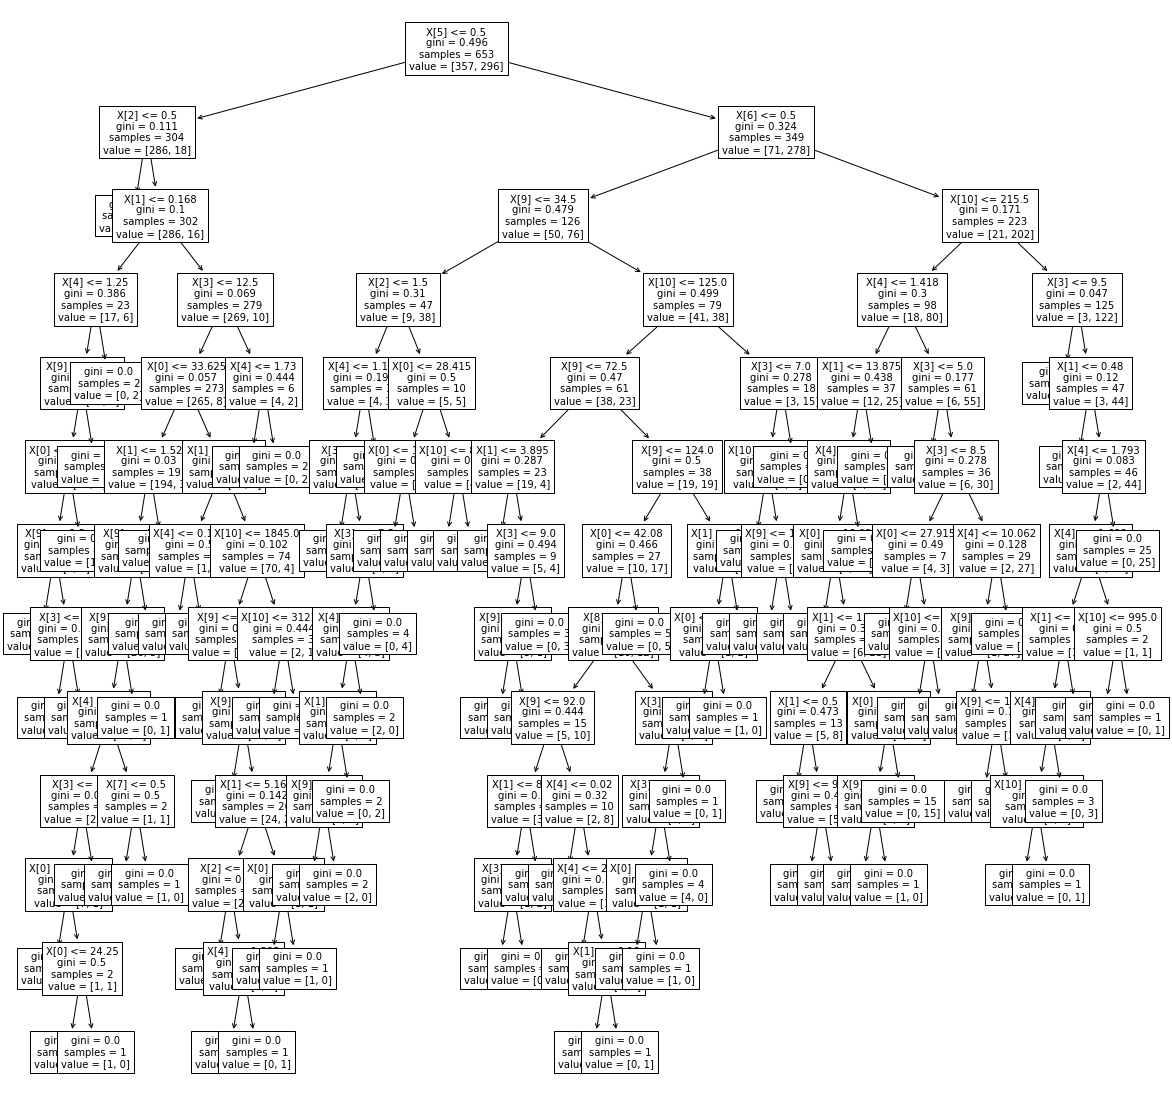

In [52]:
X, y = prepareDatasetForRegression(datasetWithRemovedRows, transformationTypes[0], hasLeastScoresFeatures = False)
model.fit(X, y)
plt.figure(figsize=(20, 20))
plot_tree(model, fontsize=10)


Plot test results for Logistic Regression vs Decision tree classifier models:


(78.0, 88.0)

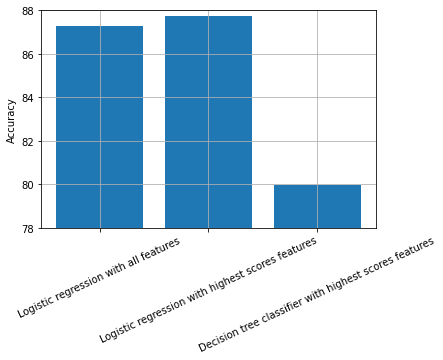

In [85]:
allFeaturesLogisticRegressionProcessedTestResults = processTestResults(allFeaturesLogisticRegressionTestResults)
highestScoresFeaturesLogisticRegressionProcessedTestResults = processTestResults(highestScoresFeaturesLogisticRegressionTestResults)
highestScoresFeaturesDecisionTreeProcessedTestResults = processTestResults(highestScoresFeaturesDecisionTreeTestResults)

def getHighestAccuracy(accuracies):
    return np.max(list(accuracies.values()))
    
print("\nPlot test results for Logistic Regression vs Decision tree classifier models:")
summary = {
    "Logistic regression with all features": getHighestAccuracy(allFeaturesLogisticRegressionProcessedTestResults[2]),
    "Logistic regression with highest scores features": getHighestAccuracy(highestScoresFeaturesLogisticRegressionProcessedTestResults[2]),
    "Decision tree classifier with highest scores features": getHighestAccuracy(highestScoresFeaturesDecisionTreeProcessedTestResults[2]),
}
plotSummary(summary)
plt.ylim(78, 88)

In [95]:
algTestResultsDataFrame = allFeaturesLogisticRegressionProcessedTestResults[0]
algTestResultsDataFrameSplitsSummarized = allFeaturesLogisticRegressionProcessedTestResults[1]
algKFoldTransformsSummarized = allFeaturesLogisticRegressionProcessedTestResults[2]
algKFoldDatasetsSummarized = allFeaturesLogisticRegressionProcessedTestResults[3]
algGridSearchTransformsSummarized = allFeaturesLogisticRegressionProcessedTestResults[4]
algGridSearchDatasetsSummarized = allFeaturesLogisticRegressionProcessedTestResults[5]

hlgTestResultsDataFrame = highestScoresFeaturesLogisticRegressionProcessedTestResults[0]
hlgTestResultsDataFrameSplitsSummarized = highestScoresFeaturesLogisticRegressionProcessedTestResults[1]
hlgKFoldTransformsSummarized = highestScoresFeaturesLogisticRegressionProcessedTestResults[2]
hlgKFoldDatasetsSummarized = highestScoresFeaturesLogisticRegressionProcessedTestResults[3]
hlgGridSearchTransformsSummarized = highestScoresFeaturesLogisticRegressionProcessedTestResults[4]
hlgGridSearchDatasetsSummarized = highestScoresFeaturesLogisticRegressionProcessedTestResults[5]

hdtTestResultsDataFrame = highestScoresFeaturesDecisionTreeProcessedTestResults[0]
hdtTestResultsDataFrameSplitsSummarized = highestScoresFeaturesDecisionTreeProcessedTestResults[1]
hdtKFoldTransformsSummarized = highestScoresFeaturesDecisionTreeProcessedTestResults[2]
hdtKFoldDatasetsSummarized = highestScoresFeaturesDecisionTreeProcessedTestResults[3]
hdtGridSearchTransformsSummarized = highestScoresFeaturesDecisionTreeProcessedTestResults[4]
hdtGridSearchDatasetsSummarized = highestScoresFeaturesDecisionTreeProcessedTestResults[5]


Plot summarized test results for Logistic Regression model of all features:


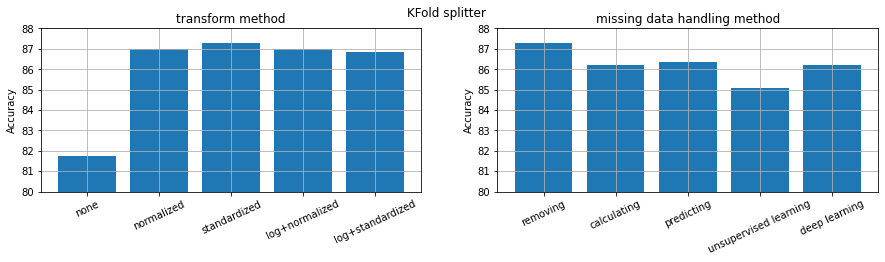

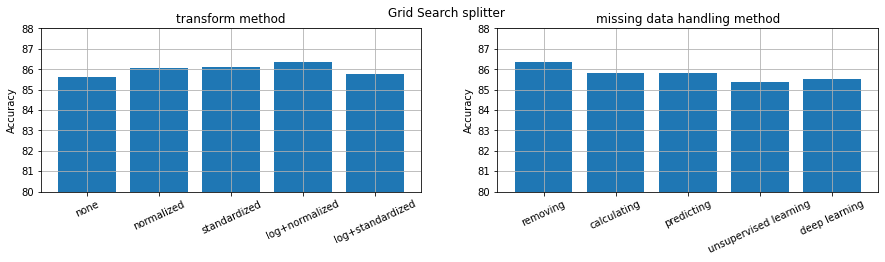

In [96]:
print("\nPlot summarized test results for Logistic Regression model of all features:")
plotSummarizedResults(algKFoldDatasetsSummarized,algKFoldTransformsSummarized,algGridSearchDatasetsSummarized,algGridSearchTransformsSummarized)


Plot summarized test results for Logistic Regression model of highest scores features only:


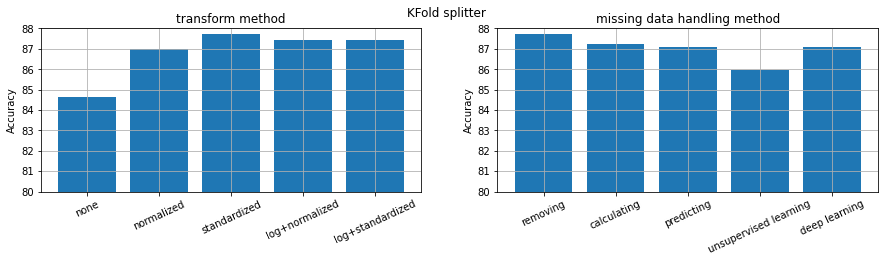

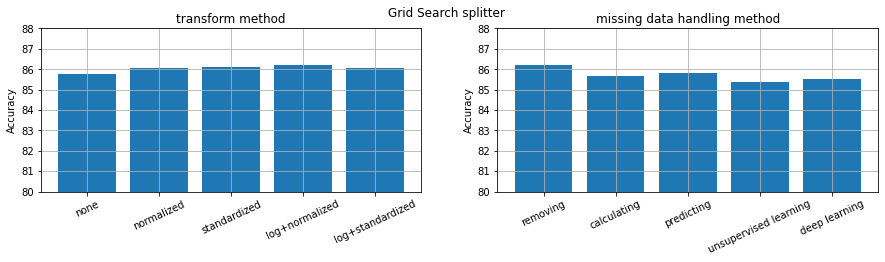

In [97]:
print("\nPlot summarized test results for Logistic Regression model of highest scores features only:")
plotSummarizedResults(hlgKFoldDatasetsSummarized,hlgKFoldTransformsSummarized,hlgGridSearchDatasetsSummarized,hlgGridSearchTransformsSummarized)


Plot summarized test results for Decision Tree Classifier model of highest scores features only:


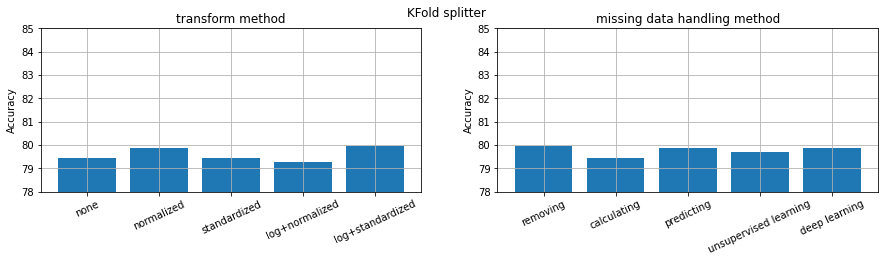

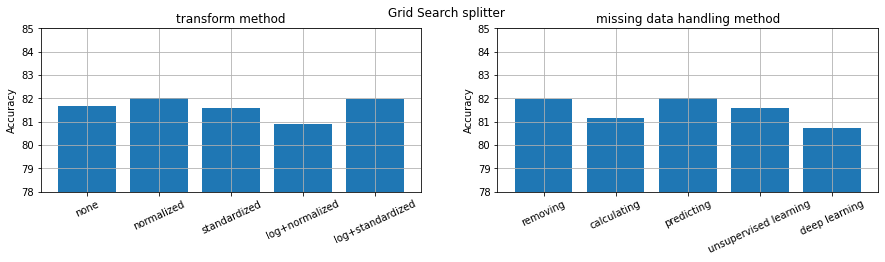

In [98]:
print("\nPlot summarized test results for Decision Tree Classifier model of highest scores features only:")
plotSummarizedResults(hdtKFoldDatasetsSummarized,hdtKFoldTransformsSummarized,hdtGridSearchDatasetsSummarized,hdtGridSearchTransformsSummarized, ylim=(78,85))

<font color=grey size=3>Focus on Logistic Regression with highest scores features only as it clearly has the <b>highest</b> accuracy (slightly higher than with all features and much higher than Decision Tree Classifier).</font>

In [100]:
hlgTestResultsDataFrameSplitsSummarized

none                                 \
           after removing missing rows after calculating missing rows   
KFold                           84.386                         82.174   
GridSearch                      85.760                         85.217   

                                          \
           after predicting missing rows   
KFold                             84.203   
GridSearch                        85.072   

                                                     \
           after unsupervised learning missing rows   
KFold                                        83.060   
GridSearch                                   84.497   

                                                             normalized  \
           after deep learning missing rows after removing missing rows   
KFold                                84.638                      86.983   
GridSearch                           84.789                      86.067   

                                                                         \
           after calculating missing rows after predicting missing rows   
KFold                              86.667                        86.812   
GridSearch                         85.362                        85.362   

                                                     \
           after unsupervised learning missing rows   
KFold                                        85.507   
GridSearch                                   85.369   

                                             ...              log+normalized  \
           after deep learning missing rows  ... after removing missing rows   
KFold                                85.942  ...                      87.441   
GridSearch                           85.507  ...                      86.220   

                                                                         \
           after calculating missing rows after predicting missing rows   
KFold                              87.246                        87.101   
GridSearch                         85.652                        85.652   

                                                     \
           after unsupervised learning missing rows   
KFold                                        85.652   
GridSearch                                   84.060   

                                                       log+standardized  \
           after deep learning missing rows after removing missing rows   
KFold                                87.101                      87.441   
GridSearch                           85.072                      86.065   

                                                                         \
           after calculating missing rows after predicting missing rows   
KFold                              86.377                        86.812   
GridSearch                         84.783                        85.217   

                                                     \
           after unsupervised learning missing rows   
KFold                                        85.942   
GridSearch                                   84.058   

                                             
           after deep learning missing rows  
KFold                                86.522  
GridSearch                           84.638  

[2 rows x 25 columns]

In [101]:
hlgTestResultsDataFrame['KFold']

none                                 \
   after removing missing rows after calculating missing rows   
2                       84.386                         79.420   
3                       83.308                         82.174   
4                       83.482                         81.310   
5                       80.568                         79.565   
10                      80.476                         81.304   

                                                                           \
   after predicting missing rows after unsupervised learning missing rows   
2                         78.841                                   81.014   
3                         82.029                                   80.725   
4                         83.203                                   83.060   
5                         78.841                                   78.551   
10                        84.203                                   81.594   

                                                     normalized  \
   after deep learning missing rows after removing missing rows   
2                            83.623                      86.224   
3                            84.638                      86.983   
4                            82.333                      85.779   
5                            81.594                      85.767   
10                           81.884                      85.354   

                                                                 \
   after calculating missing rows after predicting missing rows   
2                          85.217                        85.362   
3                          86.667                        86.812   
4                          84.361                        84.796   
5                          84.638                        84.638   
10                         84.058                        84.203   

                                                                              \
   after unsupervised learning missing rows after deep learning missing rows   
2                                    84.058                           85.362   
3                                    85.507                           85.942   
4                                    85.231                           84.796   
5                                    83.768                           84.348   
10                                   84.058                           84.058   

    ...              log+normalized                                 \
    ... after removing missing rows after calculating missing rows   
2   ...                      86.836                         85.797   
3   ...                      87.441                         87.246   
4   ...                      84.707                         84.363   
5   ...                      84.391                         83.333   
10  ...                      84.732                         83.478   

                                                                           \
   after predicting missing rows after unsupervised learning missing rows   
2                         85.942                                   83.768   
3                         87.101                                   85.652   
4                         84.363                                   83.491   
5                         83.043                                   83.043   
10                        83.623                                   83.913   

                                               log+standardized  \
   after deep learning missing rows after removing missing rows   
2                            85.797                      85.456   
3                            87.101                      87.441   
4                            83.928                      84.244   
5                            83.333                      83.930   
10                           83.478                      84.427   

                            

In [102]:
hlgTestResultsDataFrame['GridSearch']

none                                 \
   after removing missing rows after calculating missing rows   
2                       85.760                         85.217   
3                       84.686                         83.623   
4                       85.015                         85.079   
5                       85.450                         84.203   
10                      85.501                         84.493   

                                                                           \
   after predicting missing rows after unsupervised learning missing rows   
2                         85.072                                   83.623   
3                         83.623                                   82.174   
4                         84.934                                   84.497   
5                         84.203                                   83.913   
10                        84.638                                   84.348   

                                                     normalized  \
   after deep learning missing rows after removing missing rows   
2                            84.783                      86.067   
3                            83.768                      85.908   
4                            84.789                      85.934   
5                            84.203                      85.910   
10                           84.058                      85.960   

                                                                 \
   after calculating missing rows after predicting missing rows   
2                          85.362                        85.362   
3                          85.072                        85.072   
4                          84.933                        85.079   
5                          84.928                        85.072   
10                         84.783                        84.638   

                                                                              \
   after unsupervised learning missing rows after deep learning missing rows   
2                                    84.058                           85.507   
3                                    84.058                           84.783   
4                                    85.369                           84.933   
5                                    84.493                           84.638   
10                                   84.928                           84.928   

    ...              log+normalized                                 \
    ... after removing missing rows after calculating missing rows   
2   ...                      86.220                         85.652   
3   ...                      85.297                         84.203   
4   ...                      85.321                         84.642   
5   ...                      84.990                         84.058   
10  ...                      84.881                         84.058   

                                                                           \
   after predicting missing rows after unsupervised learning missing rows   
2                         85.652                                   83.913   
3                         84.348                                   83.188   
4                         84.932                                   84.060   
5                         84.058                                   83.768   
10                        84.058                                   84.058   

                                               log+standardized  \
   after deep learning missing rows after removing missing rows   
2                            85.072                      86.065   
3                            84.203                      84.531   
4                            84.642                      84.859   
5                            84.058                      84.834   
10                           84.203                      84.727   

                            

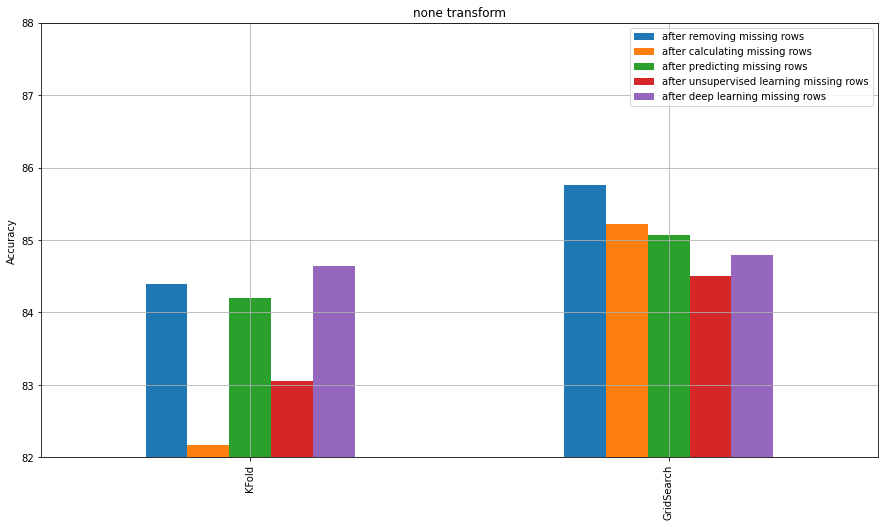

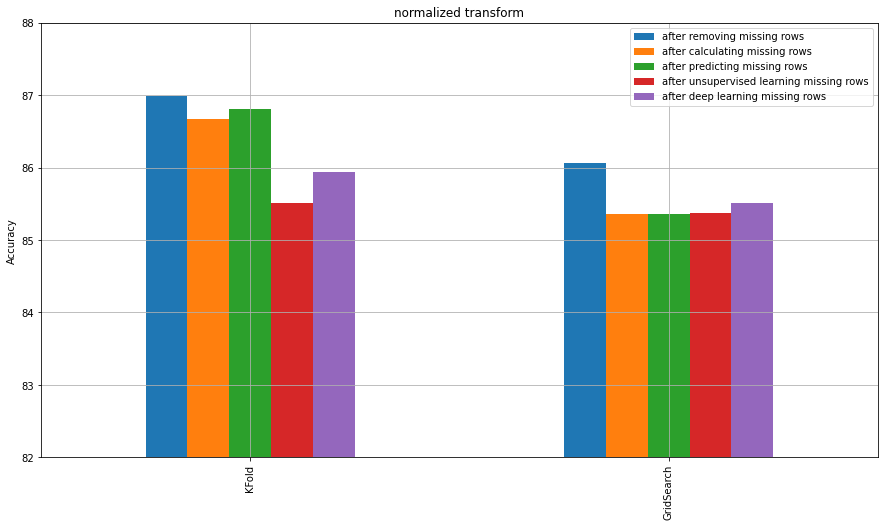

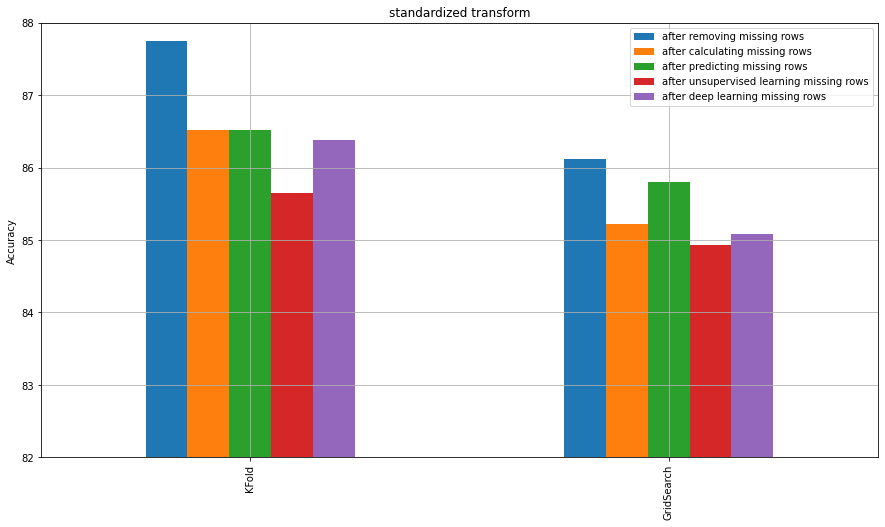

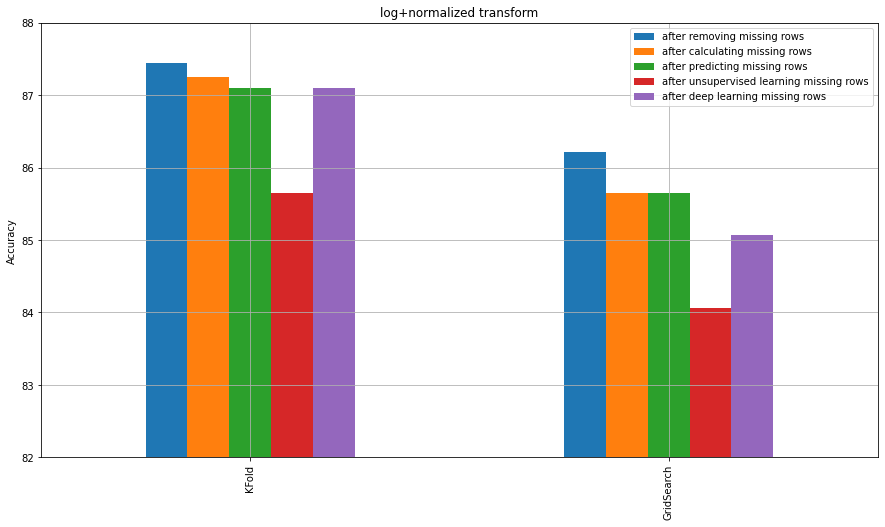

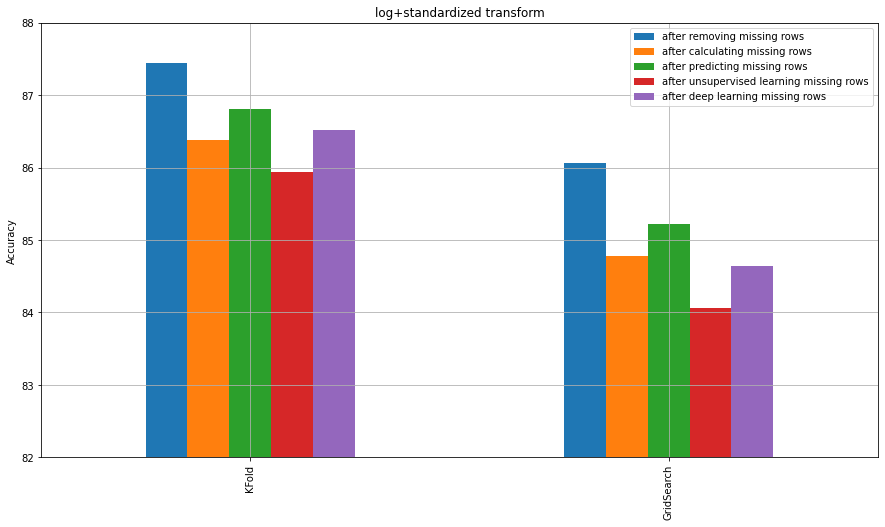

In [103]:
plotTransformTypesSummarizedResults(hlgTestResultsDataFrameSplitsSummarized)

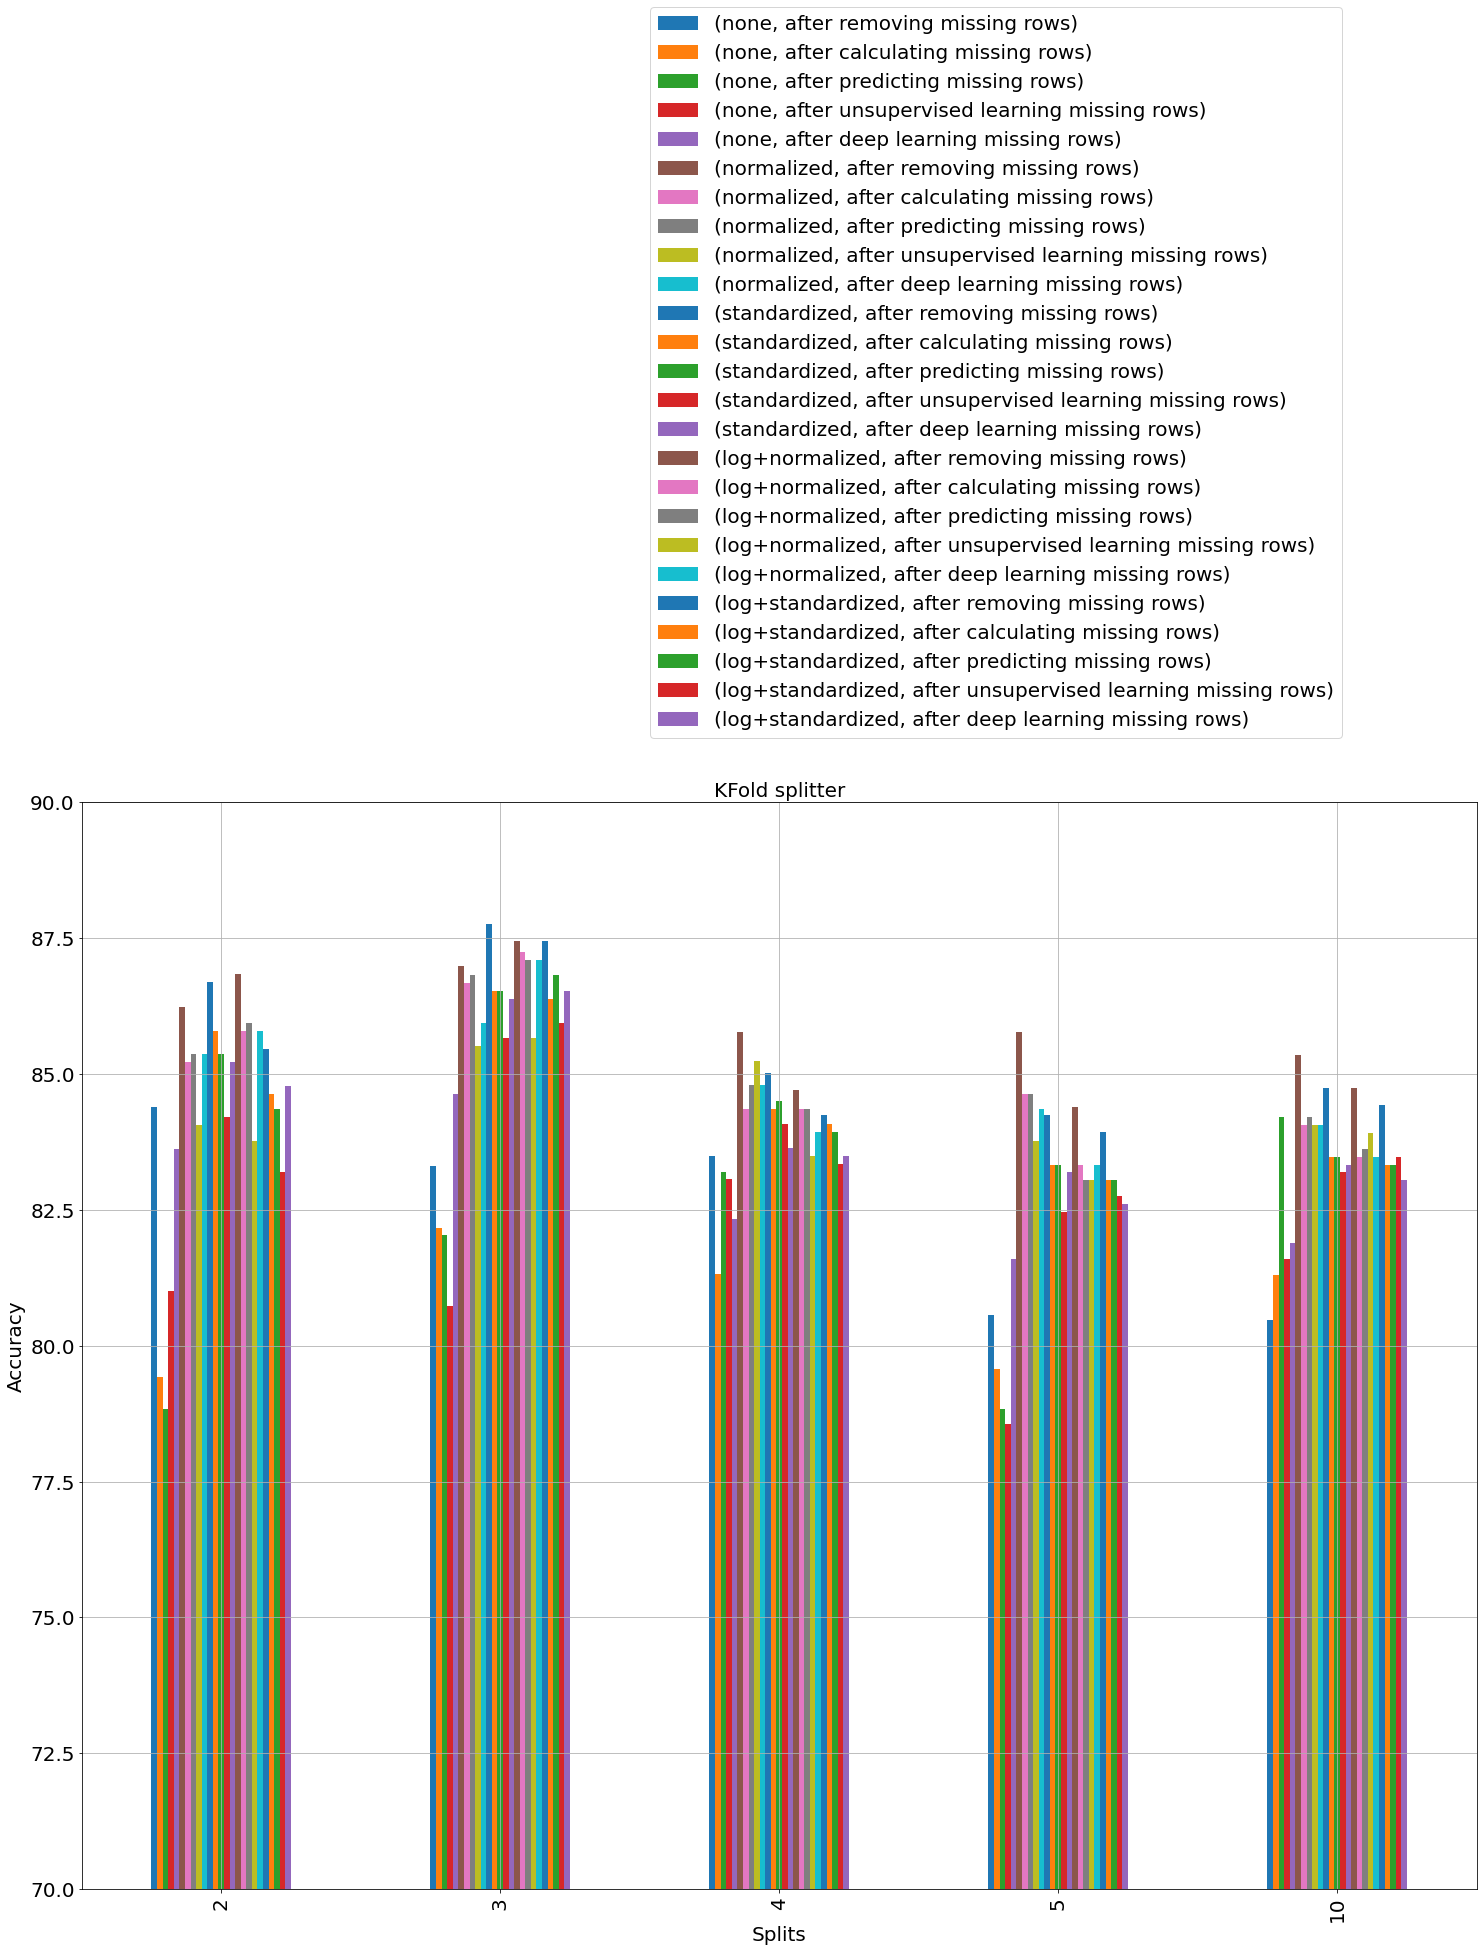

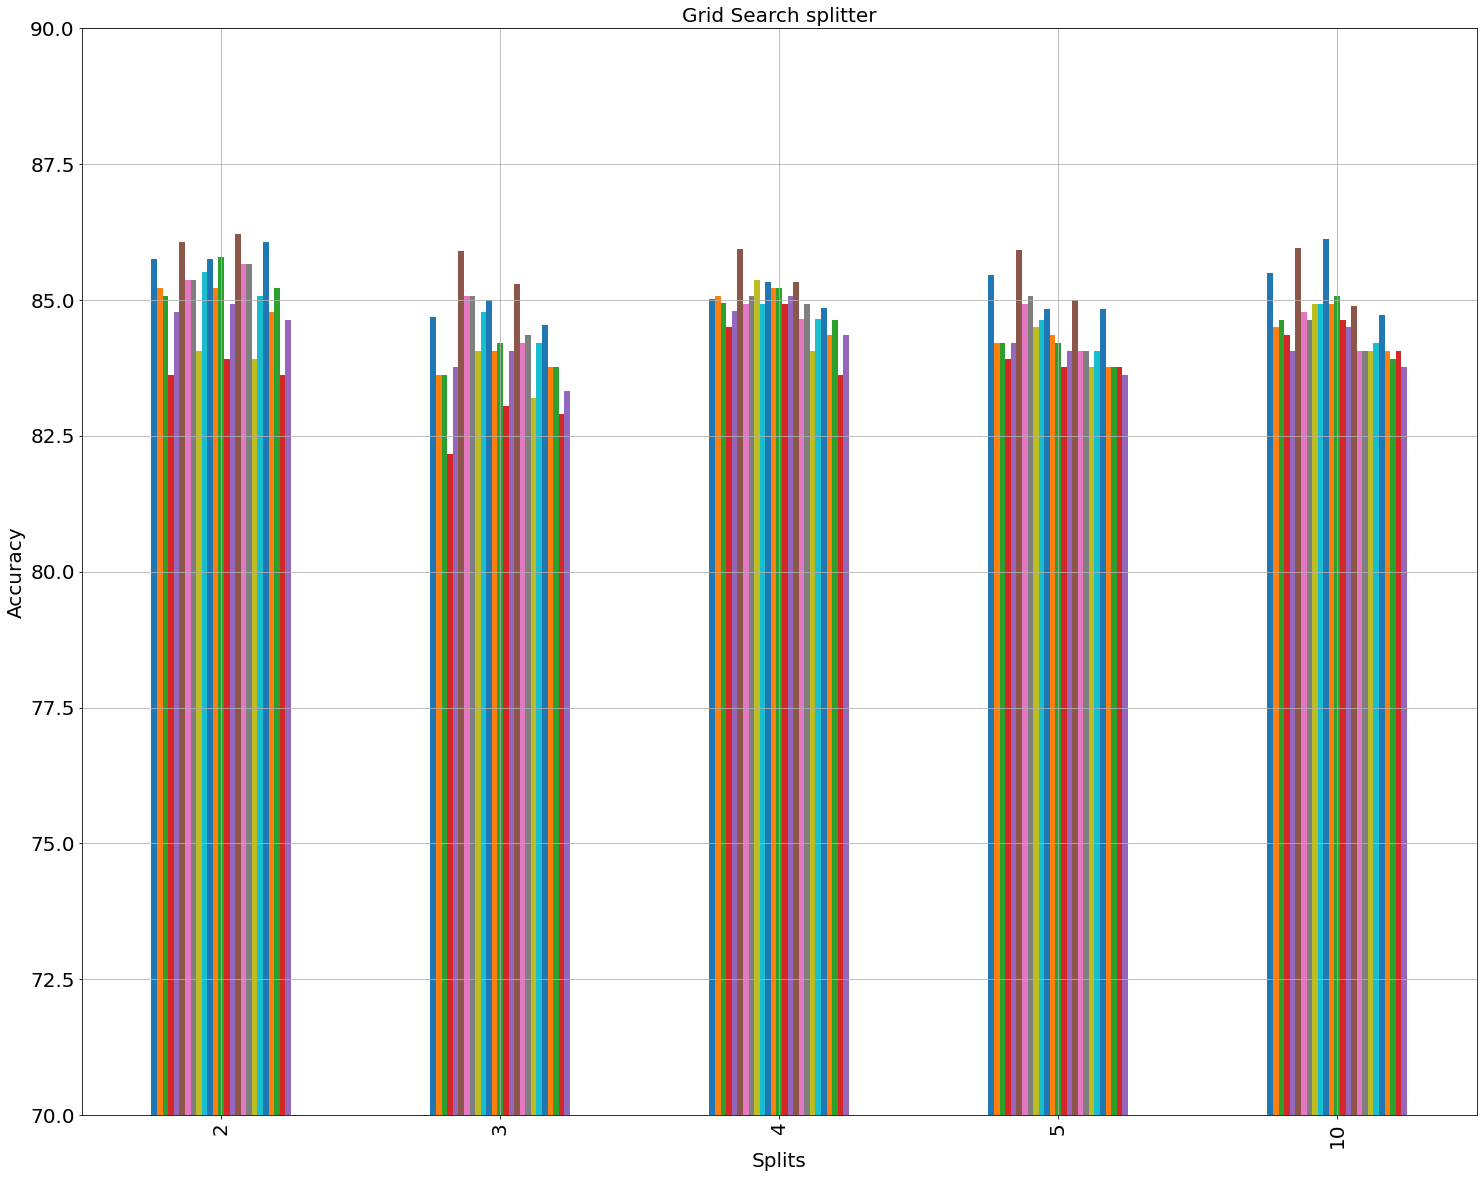

In [104]:
plotDetailedResults(hlgTestResultsDataFrame)